In [145]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import statsmodels.api as sm


In [175]:
#DATA CLEANING CELL
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# print(len(my_data.columns))
crime_data = crime_data.drop(columns=['Vict Descent','Status','Status Desc'])
# print(len(my_data.columns))
all_c = list(crime_data.columns)
final = []
for i in all_c:
    if 'Crm' not in i:
        final.append(i)
final.append('Crm Cd 1')
print(final)
crime_data.dropna(inplace=True,subset=final)
# my_data = my_data[my_data['LON'] != 0]
# my_data = my_data[my_data['LAT'] != 0]

print(len(crime_data))

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Mocodes', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street', 'LAT', 'LON', 'Crm Cd 1']
67385


In [176]:
# CODE TO DROP CRIMES WITH ONLY A FEW INCIDENTS
X = crime_data.drop(columns=['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Crm Cd'])
y = crime_data['Crm Cd']
# allowed number of crime incidents to keep in data
num_incidents = 2000
crimes = []
for i in set(y):
    if len(crime_data[crime_data['Crm Cd']==i])>num_incidents:
        crimes.append(i)

new_df = crime_data[crime_data['Crm Cd'].isin(crimes)]


In [148]:
crime_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd,Weapon Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
10,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,306.0,ROCK/THROWN OBJECT,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648
17,200506268,02/22/2020 12:00:00 AM,02/22/2020 12:00:00 AM,1900,5,Harbor,511,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,624.0,NaN,NaN,PACIFIC COAST,VERMONT,33.7926,-118.3043
19,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,...,204.0,FOLDING KNIFE,210.0,NaN,NaN,NaN,7TH,HILL,34.0463,-118.2550
27,200100552,01/19/2020 12:00:00 AM,01/19/2020 12:00:00 AM,2000,1,Central,111,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,500.0,UNKNOWN WEAPON/OTHER WEAPON,230.0,NaN,NaN,NaN,ALAMEDA,LOS ANGELES,34.0578,-118.2371
34,200100568,01/27/2020 12:00:00 AM,01/27/2020 12:00:00 AM,1500,1,Central,166,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,500.0,UNKNOWN WEAPON/OTHER WEAPON,930.0,998.0,NaN,NaN,6TH,SAN JULIAN,34.0428,-118.2461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825103,230616011,10/03/2023 12:00:00 AM,10/03/2023 12:00:00 AM,1055,6,Hollywood,657,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,207.0,OTHER KNIFE,230.0,998.0,NaN,NaN,VAN NESS,SANTA MONICA,34.0907,-118.3157
825114,230311153,05/20/2023 12:00:00 AM,05/20/2023 12:00:00 AM,1820,3,Southwest,356,1,210,ROBBERY,...,106.0,UNKNOWN FIREARM,210.0,NaN,NaN,NaN,WESTERN AV,JEFFERSON BL,34.0256,-118.3089
825127,231814456,08/02/2023 12:00:00 AM,07/28/2023 12:00:00 AM,2330,18,Southeast,1823,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,NaN,NaN,NaN,SAN PEDRO ST,CENTURY BL,33.9456,-118.2695
825163,232004024,01/01/2023 12:00:00 AM,01/01/2023 12:00:00 AM,1130,20,Olympic,2029,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,500.0,UNKNOWN WEAPON/OTHER WEAPON,230.0,NaN,NaN,NaN,WILSHIRE BL,VERMONT AV,34.0618,-118.2917


In [177]:
new_df['Street Location'] = new_df['LOCATION'] + new_df['Cross Street']
df = pd.get_dummies(new_df, columns = ['Street Location','Vict Sex', 'Premis Cd', 'Weapon Used Cd'], drop_first=True)
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')



/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_12289/2834638455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Street Location'] = new_df['LOCATION'] + new_df['Cross Street']


In [179]:
# df['year'] = df['DATE OCC'].dt.year
# df['month'] = df['DATE OCC'].dt.month
# df['day'] = df['DATE OCC'].dt.day
# df['hour'] = df['DATE OCC'].dt.hour
# df['day_of_week'] = df['DATE OCC'].dt.dayofweek
columns_to_drop = []

for i in df.columns:
    if df[i].dtype!='float64' and df[i].dtype!= 'uint8' and df[i].dtype != 'int64':
        columns_to_drop.append(i)
    if re.search('Crm Cd*', i):
        columns_to_drop.append(i)
# columns_to_drop.append('Crm Cd 1')
# columns_to_drop.append('Crm Cd 2')
# columns_to_drop.append('Crm Cd 3')
# columns_to_drop.append('Crm Cd 4')
columns_to_drop.append('DR_NO')
columns_to_drop.append('Part 1-2')
columns_to_drop.append('TIME OCC')
columns_to_drop.append('AREA')
columns_to_drop.append('Rpt Dist No')

#print(df['LAT'].dtype)
#print(df['TIME OCC_5'].dtype)

new_df = df.drop(columns = columns_to_drop)
new_df

# columns_to_drop

,Vict Age,LAT,LON,Street Location_101 FY10 FY,Street Location_101 FYLANKERSHIM BL,Street Location_101 FYLAUREL CANYON BL,Street Location_101 FWY4TH ST,Street Location_101 FWYHIGHLAND,Street Location_101 FWYLOS ANGELES ST,Street Location_101 NORTH FYTOPANGA,...,Weapon Used Cd_507.0,Weapon Used Cd_508.0,Weapon Used Cd_509.0,Weapon Used Cd_510.0,Weapon Used Cd_511.0,Weapon Used Cd_512.0,Weapon Used Cd_513.0,Weapon Used Cd_514.0,Weapon Used Cd_515.0,Weapon Used Cd_516.0
19,66,34.0463,-118.2550,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,71,34.0578,-118.2371,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,52,34.0456,-118.2540,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,57,34.0401,-118.2459,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,28,34.0495,-118.2458,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825103,39,34.0907,-118.3157,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825114,17,34.0256,-118.3089,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825127,25,33.9456,-118.2695,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825163,40,34.0618,-118.2917,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


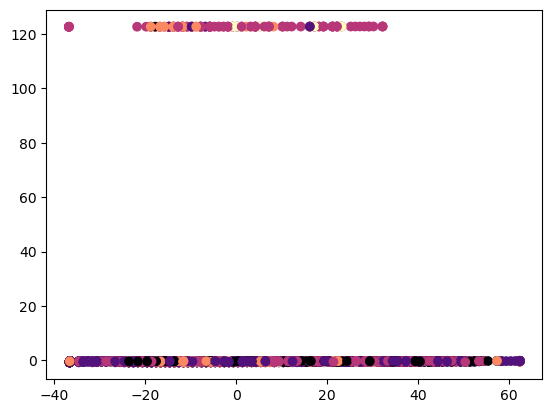

In [184]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(new_df)

le = LabelEncoder()
y = le.fit_transform(df['Crm Cd'])
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap = 'magma')

array([[ 29.3696132 ,  -0.27245268],
       [ 34.37059754,  -0.25110098],
       [ 15.36972338,  -0.29279109],
       ...,
       [-11.6306709 ,  -0.3182189 ],
       [  3.36861819,  -0.35146291],
       [ 26.37129656,  -0.20283387]])

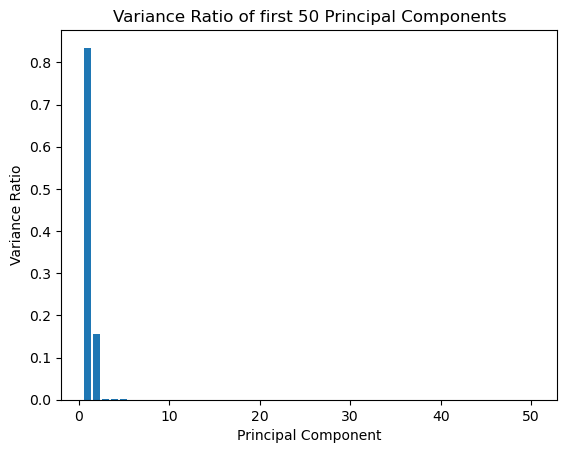

In [183]:
vals = [X_pca[:,i] for i in range(len(X_pca.T))]
le = LabelEncoder()
y = le.fit_transform(df['Crm Cd'])

plt.bar(range(1,51), pca.explained_variance_ratio_[:50])
plt.title('Variance Ratio of first 50 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

In [152]:
print(len(new_df.columns))
print(df[['Crm Cd']].nunique())

print(df[['Crm Cd']])

10156
Crm Cd    5
dtype: int64
        Crm Cd
19         210
27         230
42         230
61         230
69         624
...        ...
825103     230
825114     210
825127     626
825163     230
825185     624

[50268 rows x 1 columns]


In [74]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(df['Crm Cd'])
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3)

rf = RandomForestClassifier()
param_grid = {'n_estimators': [25,50,100], "criterion": ['gini','entropy'], "max_features": [None,'sqrt','log2'], 'max_depth': [5,10]}

rf_gs = GridSearchCV(rf,param_grid,cv = 3, n_jobs = -1)
rf_gs.fit(X_train, y_train)
#display the best parameters and your score
print(f'Best Parameters: {rf_gs.best_params_}')
print(f'Best Score: {rf_gs.best_score_}')

#get the predicted labels and display your confusion matrix
# rf_predicted = rf_gs.predict(X_test)
# CM = confusion_matrix(y_test, rf_predicted)
# print(f'Confusion Matrix:\n {CM}')

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'n_estimators': 100}
Best Score: 0.5290793275184281


In [153]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(df['Crm Cd'])
rf = RandomForestClassifier(n_estimators=200,criterion='entropy', max_depth=10, max_features=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_s = accuracy_score(y_test, y_pred)


In [154]:
accuracy_s

0.5088246338715734

In [155]:
f1_score(y_test, y_pred, average = 'micro')

0.5088246338715734

In [156]:
X = new_df
le = LabelEncoder()
y = le.fit_transform(df['Crm Cd'])
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3)

sel = SelectFromModel(RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 100))
sel.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(max_depth=10))

In [157]:
X_selected = sel.fit_transform(X_train, y_train)


In [158]:
X_selected = X_selected.astype(int)

In [159]:
sel.get_support()

array([ True,  True,  True, ...,  True, False,  True])

In [160]:
selected_feat = X_train.columns[(sel.get_support())]
X = X_train[selected_feat]

# X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2)

rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, max_features=None) 
rf.fit(X, y_train)

y_pred = rf.predict(X_test[selected_feat])


accuracy = accuracy_score(y_test, y_pred)


In [161]:
accuracy

0.5817253497778662

In [162]:
f1_score(y_test, y_pred, average = 'micro')

0.5817253497778662

In [171]:
label_names = list(map(str, df['Crm Cd'].unique()))

print(classification_report(y_test, y_pred, target_names=label_names, zero_division=0.0))

              precision    recall  f1-score   support

         210       0.50      0.13      0.21      3267
         230       0.63      0.86      0.73      5340
         624       0.55      0.75      0.63      3851
         626       0.51      0.51      0.51      1700
         761       0.54      0.01      0.03       923

    accuracy                           0.58     15081
   macro avg       0.55      0.45      0.42     15081
weighted avg       0.56      0.58      0.52     15081



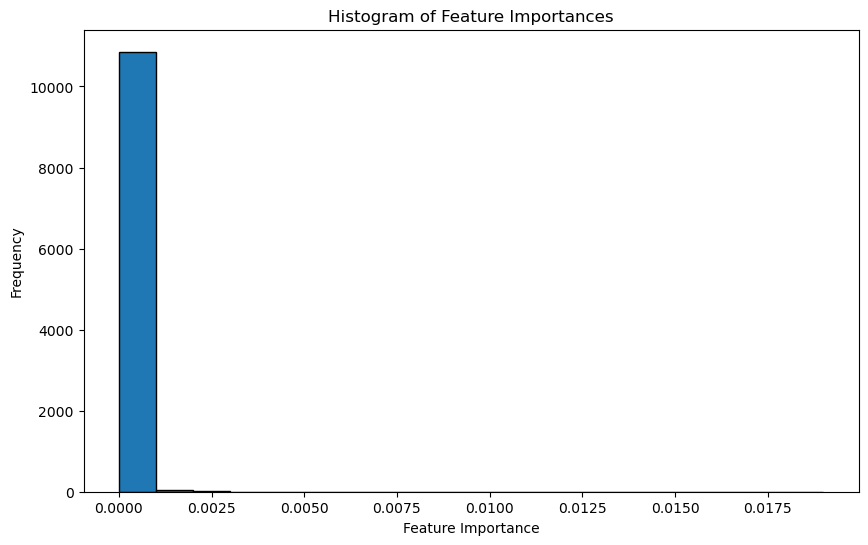

In [81]:
importance = pd.Series(sel.estimator_.feature_importances_)
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(importance, bins=np.arange(0, 0.02, 0.0), edgecolor='black')
plt.title('Histogram of Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Frequency')
plt.show()

In [186]:
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
rf = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=10, max_features=None) 
rf.fit(X_pca_train, y_train)
y_pred = rf.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred)

In [187]:
accuracy_pca

0.35382269080299716

In [24]:
#X = crime_data[['TIME OCC', 'AREA', 'Weapon Used Cd', 'Premis Cd', 'Rpt Dist No']]
X = crime_data[['Weapon Used Cd']]
y = crime_data['Crm Cd 1']
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3)

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.4406905421448358
